# Exploring Basart

<font size="4"> We can use SPARQL to explore Basart. Let's take a quick look at the corpus and lets focus on the exhibition date collected. To do so we start importing python libraries and defining a SPARQL query</font>

In [3]:
from SPARQLWrapper import SPARQLWrapper, JSON
import pandas as pd
import sparql_dataframe
import geopandas as gpd
from shapely import wkt
import matplotlib.pyplot as plt
import folium
import VizKG.visualize as vkg

In [86]:
endpoint = "http://localhost:3030/Basart/sparql"

### SPARQL Query

In [87]:
q ="""

PREFIX wd: <http://www.wikidata.org/entity/>
PREFIX wdt: <http://www.wikidata.org/prop/direct/>
PREFIX crmdig: <http://www.ics.forth.gr/isl/CRMdig/>
PREFIX rdfs: <http://www.w3.org/2000/01/rdf-schema#>
PREFIX crm: <http://www.cidoc-crm.org/cidoc-crm/>
PREFIX skos: <http://www.w3.org/2004/02/skos/core#>
PREFIX aat: <http://vocab.getty.edu/aat/>
PREFIX wikibase: <http://wikiba.se/ontology#>
PREFIX bd: <http://www.bigdata.com/rdf#>
PREFIX xsd: <http://www.w3.org/2001/XMLSchema#>


SELECT ?begin ?yearBegin WHERE  {
  
?exhibition a crm:E7_Activity ;
  rdfs:label ?exhibitionLabel ;
   crm:P4_has_time-span ?time .
   
?time crm:P82a_begin_of_the_begin ?begin .
 
BIND(YEAR(?begin) AS ?yearBegin) 

}
GROUP BY ?begin ?yearBegin
ORDER BY ASC(?begin)


"""

In [88]:
df_time = sparql_dataframe.get(endpoint, q)

### Results

In [89]:
df_time

,begin,yearBegin
0,1830-01-01T00:00:00,1830
1,1832-05-06T00:00:00,1832
2,1833-01-01T00:00:00,1833
3,1845-06-01T00:00:00,1845
4,1846-01-11T00:00:00,1846
...,...,...
1839,1997-10-12T00:00:00,1997
1840,1998-01-01T00:00:00,1998
1841,2006-03-27T00:00:00,2006
1842,2006-10-12T00:00:00,2006


<font size="4">The query is saved directly in a dataframe, allowing us to use python for applying a series of data science methods to discover more about the data. In this instance, let's take a quick look at just how many exhibition per year are present in Basart</font>

In [90]:
df_time['counts'] = df_time.groupby(['yearBegin'])['begin'].transform('count')

<AxesSubplot: xlabel='yearBegin'>

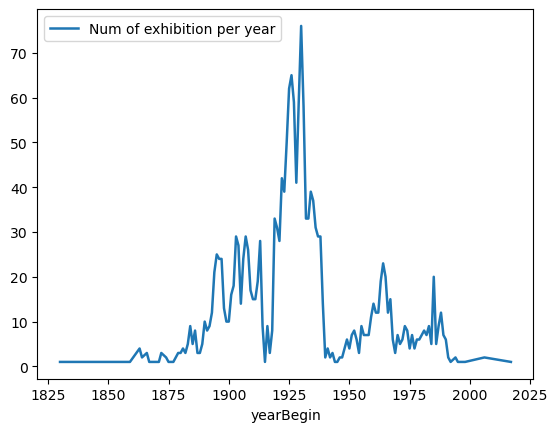

In [103]:
df_time.plot(x='yearBegin', y='counts', label="Num of exhibition per year", linewidth=1.8)

<font size="4">As you see in a few line of code we can easily analyse a large dataset, filtering out exactly what we need</font>